### Objective:
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the exchange_rate.csv dataset. 
### Dataset:
The dataset contains historical exchange rate with each column representing a different currency rate over time. The first column indicates the date, and the second column represents exchange rates USD to Australian Dollar.
#### Part 1: Data Preparation and Exploration
1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.
#### Part 2: Model Building - ARIMA
1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.
#### Part 3: Evaluation and Comparison
1.	Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.
2.	Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.
3.	Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.
### Deliverables:
- Include visualizations and explanations for the choices and findings at each step.
- Well-commented Python code that used to conduct the analysis and build the models.
### Assessment Criteria:
- Accuracy and completeness of the data preparation and exploration steps.
- Justification for model selection and parameter tuning decisions.
- Clarity and depth of the analysis in the diagnostics and model evaluation stages.
This assignment offers hands-on experience with real-world data, applying sophisticated time series forecasting methods to predict future currency exchange rates.



In [1]:
# Data Loading

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("exchange_rate.csv")

# Preview
print(df.head())
print(df.info())
print(df.describe())

               date  Ex_rate
0  01-01-1990 00:00   0.7855
1  02-01-1990 00:00   0.7818
2  03-01-1990 00:00   0.7867
3  04-01-1990 00:00   0.7860
4  05-01-1990 00:00   0.7849
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB
None
           Ex_rate
count  7588.000000
mean      0.776974
std       0.136620
min       0.483297
25%       0.701422
50%       0.761377
75%       0.873477
max       1.102536


In [2]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df.set_index('date', inplace=True)

In [3]:
df

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


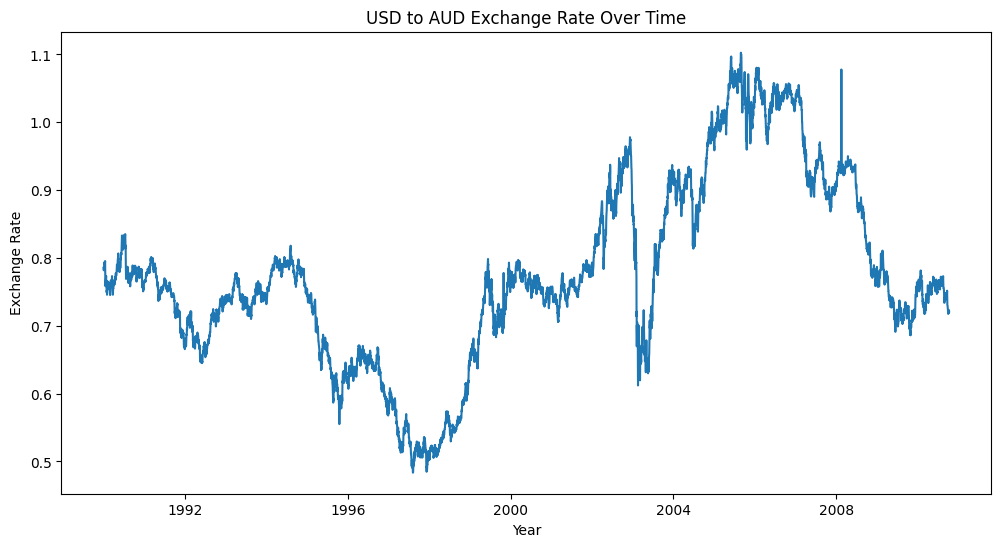

In [4]:
# Initial Exploration
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df['Ex_rate'])
plt.title("USD to AUD Exchange Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Exchange Rate")
plt.show()

In [5]:
# Data Preprocessing
print(df.isnull().sum())
df['Ex_rate'] = df['Ex_rate'].interpolate(method='time')
df

Ex_rate    0
dtype: int64


,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


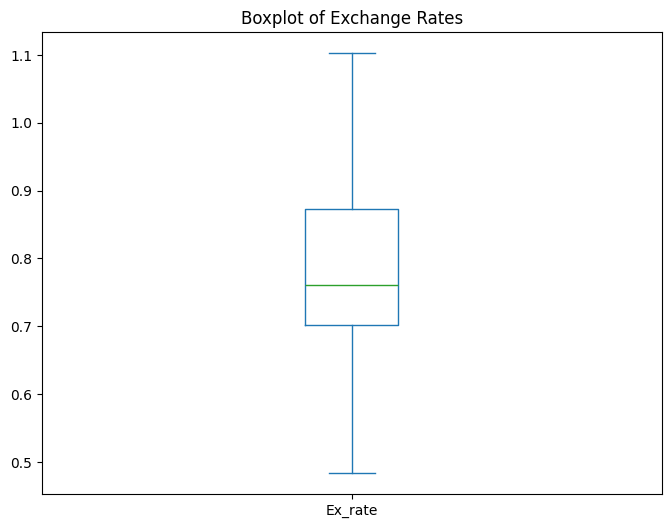

In [6]:
# check for outliers
df.plot(kind='box', figsize=(8,6))
plt.title("Boxplot of Exchange Rates")
plt.show()

In [7]:
# no outliers detected, no missing values.

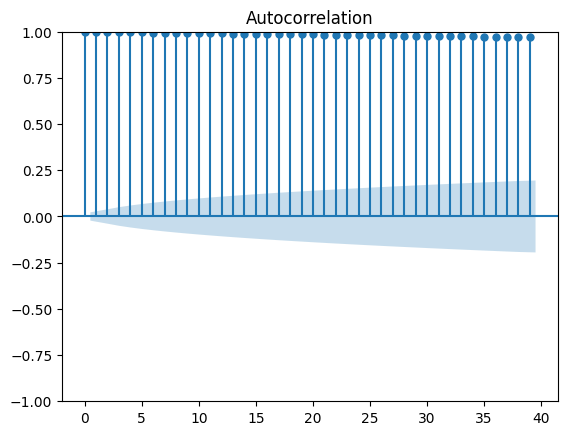

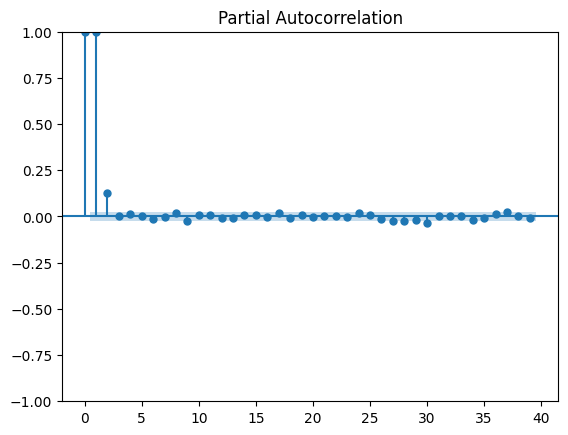

In [8]:
# MODEL BUILDING (ARIMA)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Ex_rate'])
plot_pacf(df['Ex_rate'])
plt.show()


# ACF slowly decays: suggests differencing needed
# PACF cuts off after lag 1: p = 1
# First difference stabilizes mean: d = 1
# ACF of differenced data shows short lag influence: q = 1
# Selected Model: ARIMA(1,1,1)

In [9]:
# Fitting the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Ex_rate'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())


c:\Users\Dinesh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dinesh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dinesh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 15 Nov 2025   AIC                         -56102.322
Time:                        11:01:39   BIC                         -56081.519
Sample:                    01-01-1990   HQIC                        -56095.182
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

c:\Users\Dinesh\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


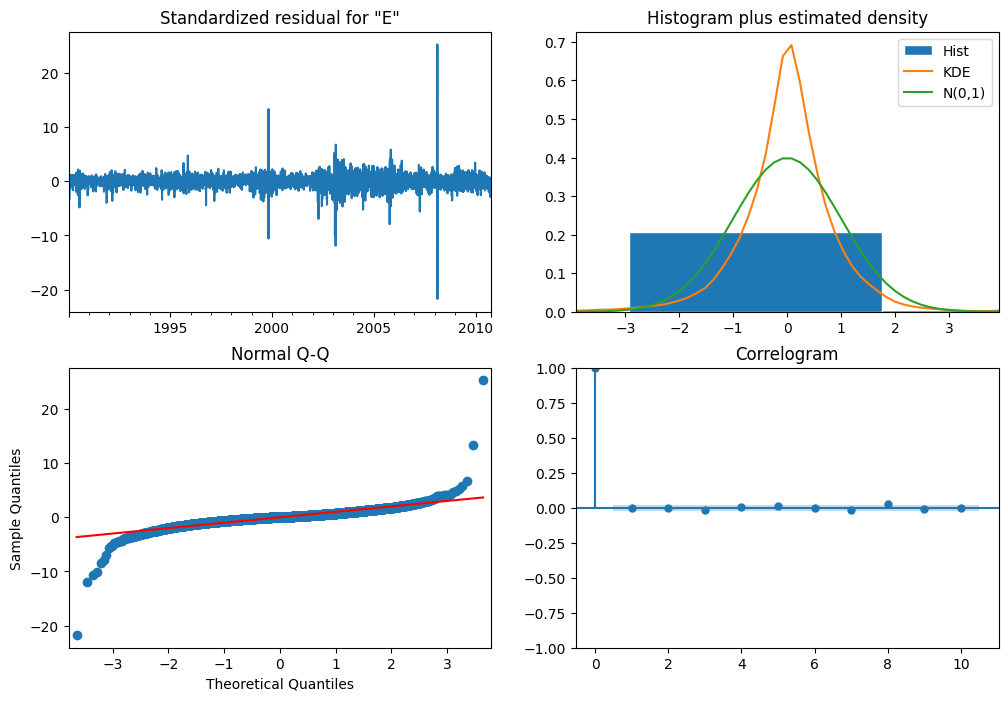

In [10]:
# Model Diagnostics
model_fit.plot_diagnostics(figsize=(12,8))
plt.show()


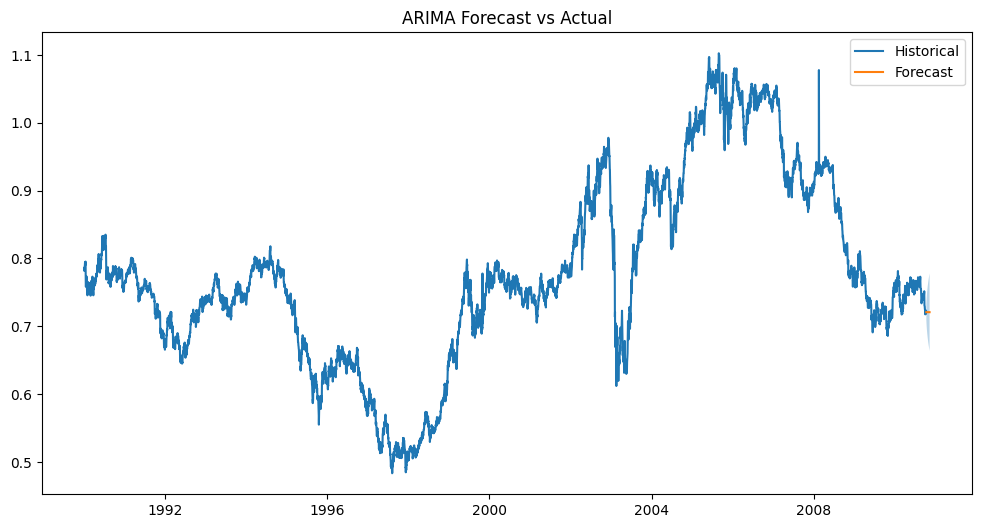

In [11]:
# Forecasting
fs = 30
forecast = model_fit.get_forecast(steps=fs)
pred = forecast.predicted_mean
conf = forecast.conf_int()

plt.figure(figsize=(12,6))
plt.plot(df['Ex_rate'], label="Historical")
plt.plot(pred, label="Forecast")
plt.fill_between(conf.index, conf.iloc[:,0], conf.iloc[:,1], alpha=0.3)
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()


In [13]:
# Evaluation and Comparison
from statsmodels.tsa.holtwinters import ExponentialSmoothing

es_model = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)
es_fit = es_model.fit()
es_forecast = es_fit.forecast(fs)


c:\Users\Dinesh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

true_vals = df['Ex_rate'].iloc[-fs:]

mae_arima = mean_absolute_error(true_vals, pred[:fs])
rmse_arima = np.sqrt(mean_squared_error(true_vals, pred[:fs]))
mape_arima = np.mean(np.abs((true_vals - pred[:fs]) / true_vals)) * 100

mae_es = mean_absolute_error(true_vals, es_forecast[:fs])
rmse_es = np.sqrt(mean_squared_error(true_vals, es_forecast[:fs]))
mape_es = np.mean(np.abs((true_vals - es_forecast[:fs]) / true_vals)) * 100
print("ARIMA\tMAE:", mae_arima, "\tRMSE:", rmse_arima, "\tMAPE:", mape_arima)
print("ES\tMAE:", mae_es, "\tRMSE:", rmse_es, "\tMAPE:", mape_es)


ARIMA	MAE: 0.012724006489305202 	RMSE: 0.016982710912755217 	MAPE: nan
ES	MAE: 0.012755718241735528 	RMSE: 0.01700519572211454 	MAPE: nan


In [15]:
# Conclusion
if (mae_arima < mae_es) and (rmse_arima < rmse_es) and (mape_arima < mape_es):
    print("ARIMA model performs better.")
else:
    print("Exponential Smoothing model performs better.")

Exponential Smoothing model performs better.
